In [1]:
REPO = '.'
RESULT_TABLE = f'{REPO}/data/table'
RESULT_OBJ = f'{REPO}/data/object'
FIGURE_FOLDER= f'{REPO}/data/figure'
SETTING_FOLDER = f'{REPO}/data/setting'
EXTERNAL_DATA=f'{REPO}/data/external'


import numpy as np
import pandas as pd
import warnings
import scanpy as sc
import scPipe as sp
from IPython.display import display
import pickle

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
obs = pd.read_csv(f'{RESULT_TABLE}/GEX_OBS_Cellstate.csv',index_col=0)

In [3]:
adata = sc.read(f'{RESULT_OBJ}/gex_all.h5ad')
sc.pp.filter_genes(adata,min_cells=3) # consistent with the clustering method
sp.utils.attach_attr_from_pickle(data=adata,pickle_file=f'{RESULT_OBJ}/leiden_2000variable_genes/embeddings.pickle')
adata  = adata[obs.index,:]

loading: obsm.X_umap
loading: obsm.X_diffmap
loading: obsm.X_tsne


In [4]:
obs.rename(columns={
    'Sample_Short':'biosample_id',
    'Patient':'donor_id'},inplace=True)

In [6]:
for c in obs:
    if c not in ['BestResponse','br_short','Sample','stage']:
        adata.obs[c] = obs[c]

In [7]:
adata.obs['sex'] = 'female'
adata.obs['species'] = 'NCBITaxon:9606'
adata.obs['species__ontology_label'] = 'Homo sapiens'
adata.obs['disease'] = 'MONDO:0007254'
adata.obs['disease__ontology_label'] = 'breast cancer'
adata.obs['organ'] = 'UBERON:0000310'
adata.obs['organ__ontology_label'] = 'breast'
adata.obs['library_preparation_protocol'] = 'EFO:0030059'
adata.obs['library_preparation_protocol__ontology_label'] = '10x multiome'

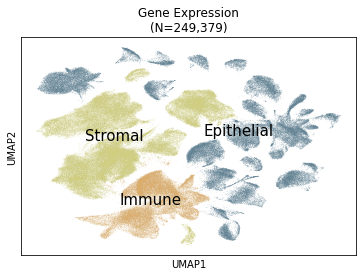

In [8]:
adata.obs['Compartment'] = pd.Categorical(adata.obs['Compartment'],['Epithelial', 'Immune', 'Stromal'])
adata.uns['Compartment_colors'] = ['#628395','#DBAD6A','#D0CE7C']
sc.pl.umap(adata,color=['Compartment'],
           title=[f"Gene Expression\n(N={adata.shape[0]:,})"],
          legend_loc='on data',legend_fontweight='normal',legend_fontsize=15)

In [9]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,...,Treatment_Arm,sex,species,species__ontology_label,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label
GTATGTGGTCCTCCAA-1_CCG1112_16_T4_A1_CCG1112_MO_Batch1,4687,8.452761,12050.0,9.396903,558.0,6.326149,4.630705,532.0,6.278521,4.414938,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
AACAAGCCAACAGGAT-1_CCG1112_16_T4_A1_CCG1112_MO_Batch1,3395,8.130354,8396.0,9.035630,11.0,2.484907,0.131015,42.0,3.761200,0.500238,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
TTATAGCCATATAACC-1_CCG1112_16_T4_A1_CCG1112_MO_Batch1,3460,8.149313,8308.0,9.025095,123.0,4.820282,1.480501,72.0,4.290459,0.866635,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
ATCACAATCCCTCTAA-1_CCG1112_16_T4_A1_CCG1112_MO_Batch1,3286,8.097731,7344.0,8.901775,25.0,3.258097,0.340414,71.0,4.276666,0.966776,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
CCTCAAACAGGCATGA-1_CCG1112_16_T4_A1_CCG1112_MO_Batch1,3574,8.181720,7061.0,8.862484,55.0,4.025352,0.778926,203.0,5.318120,2.874947,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAAGAAAAGTGGACGT-1_CCG1112_13_T3_A1_SN_5GEX_CCG1112_snRNA_Batch1,493,6.202536,597.0,6.393591,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
CCTCTGAGTCGTTGTA-1_CCG1112_13_T3_A1_SN_5GEX_CCG1112_snRNA_Batch1,503,6.222576,600.0,6.398595,0.0,0.000000,0.000000,2.0,1.098612,0.333333,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
GTCTCGTAGTGGGTTG-1_CCG1112_13_T3_A1_SN_5GEX_CCG1112_snRNA_Batch1,412,6.023448,562.0,6.333280,28.0,3.367296,4.982206,4.0,1.609438,0.711744,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome
GTAACTGTCATGGTCA-1_CCG1112_13_T3_A1_SN_5GEX_CCG1112_snRNA_Batch1,461,6.135565,596.0,6.391917,6.0,1.945910,1.006711,5.0,1.791759,0.838926,...,Chemo->Combo,female,NCBITaxon:9606,Homo sapiens,MONDO:0007254,breast cancer,UBERON:0000310,breast,EFO:0030059,10x multiome


In [11]:
adata.obs.index.name = "NAME"
path = 'data/object/scp/gex.h5ad'
adata.write(path)

In [ ]:
!gsutil cp $path gs://fc-eafb77a0-6d15-4be2-a907-2a618c9e6ce4/

## ATAC SEQ

In [30]:
adata = sc.read('../hr_brca_mo_analysis/data/result/manuscript_object/atac.h5ad')
adata.obs['sex'] = 'female'
adata.obs['species'] = 'NCBITaxon:9606'
adata.obs['species__ontology_label'] = 'Homo sapiens'
adata.obs['disease'] = 'MONDO:0007254'
adata.obs['disease__ontology_label'] = 'breast cancer'
adata.obs['organ'] = 'UBERON:0000310'
adata.obs['organ__ontology_label'] = 'breast'
adata.obs['library_preparation_protocol'] = 'EFO:0030059'
adata.obs['library_preparation_protocol__ontology_label'] = '10x multiome'

In [32]:
path = 'data/object/scp/atac.h5ad'
adata.write(path)
!gsutil cp $path gs://fc-eafb77a0-6d15-4be2-a907-2a618c9e6ce4/

Copying file://data/object/scp/atac.h5ad [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

\ [1 files][504.8 MiB/504.8 MiB]                                                
Operation completed over 1 objects/504.8 MiB.                                    
